<a href="https://colab.research.google.com/github/NastyaSNK/MISIS_DS_Masters_degree_2020/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Intellivision](https://www.intelli-vision.com/) image clustering

Dataset is a collection of vehicles Images. For each image we have feature vectors (descriptors) obtained using different deep models.
The task is using datasets with descriptors find clusters and try to understand what does particular cluster means. For each type of datasets with descriptors try to using different algorithms, compare results wich this algoritms produce and find wich one is better. Quality metrics and how easy is it to interpret clusters could help with comparing algoritms.
It would be perfect if you also could find outliers (bad quality images or images without vhenicle).
The result is a Juputer notebook and csv file with best cluster labels.


**Tasks**
A For each type of descriptors:
 1. Сlustering
 2. Finding outliers
 3. Visualization of results
 4. Interpretation of results
B. Compare clustering results by metrics*, visualization and interpretation\
C. Try to use another descriptors\
*-calinski_harabasz_score(greater is better), davies_bouldin_score(smaller is better)

**Cloud9**\
-Lushpina Ekaterina\
-Anastasia Sukhonosenko - research creator\
-Alexander Kudryavtsev\
-Natalia Avdeeva\
-Pavel Ozernov\
_______________________________________________________________________________
Даны изображения транспортных средств различных типов и с разных ракурсов. 
Для каждого изображения есть вектора признаков (дескрипторы), полученные с помощью разных глубоких моделей. 

Задача состоит в том, чтобы, используя дескрипторы, разбить изображения на кластеры и проинтерпретировать каждый из них.
Для всех вариантов дескрипторов нужно применить несколько алгоритмов кластеризации и сравнить полученные результаты. 
Сравнивать можно по метрикам и по тому, насколько кластера хорошо интерпретируются. 

Дополнительным плюсом будет, если среди изображений будут выделены выбросы. 
Это могут быть изображения плохого качества, изображения, на которых нет транспортных средств и т.д.

**В качестве результата должен быть представлен jupyter notebook с ходом решения, анализом и интерпретацией, 
а также csv файл с лучшей разбивкой на кластеры и выбросы.**


**ЗАДАНИЯ**\

A. Для каждого типа дескрипторов необходимо:\
	1. Сделать кластеризацию, подобрав алгоритм и параметры кластеризации 
	(рекомендуется ориентироваться на внутренние метрики*, интерпретируемость и визуализацию)\
	2. Выделить выбросы (данные сильно отличающиеся от основной масссы данных)\ 
	3. Сделать визуализацию в 2d или 3d\
	4. Проинтерпретировать полученные кластеры (пару предложений о том какие картинки попали в кластер)
B. Полученные кластеризации для каждого типа дескрипторов сравнить между собой (по метрикам, визуализации и по результатам интерпретации)
С. Попробовать другие дескрипторы или смесь дескрипторов. 
* calinski_harabasz_score(greater is better), davies_bouldin_score(smaller is better)

**Команда cloud9**\
-Лушпина Екатерина\
-Кудрявцев Александр\
-Авдеева Наталья\
-Павел Озернов\
-*Сухоносенко Анастасия - автор исследования*



## Loading data

In [1]:
#Connetion to gdrive. Link on the instruction: https://docs.google.com/document/d/1cMHyY9hsKCv67PyFP5rE-PgMCbmZDcdp1j9lpXvYCqE/edit?usp=sharing
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pickle

filename01 = '/content/drive/MyDrive/01_Hackathon_09/descriptors/efficientnet-b7.pickle'
filename02 = '/content/drive/MyDrive/01_Hackathon_09/descriptors/vdc_color.pickle'
filename03 = '/content/drive/MyDrive/01_Hackathon_09/descriptors/vdc_type.pickle'
filename04 = '/content/drive/MyDrive/01_Hackathon_09/descriptors/osnet.pickle'

X_efficientnet = pickle.load(open(filename01, 'rb'))
X_color = pickle.load(open(filename02, 'rb'))
X_type = pickle.load(open(filename03, 'rb'))
X_osnet = pickle.load(open(filename04, 'rb'))

print('efficientnet shape:{}\ncolor shape:{}\ntype shape:{}\nosnet shape:{}'.format(X_efficientnet.shape,X_color.shape,X_type.shape,X_osnet.shape))

efficientnet shape:(416314, 2560)
color shape:(416314, 128)
type shape:(416314, 512)
osnet shape:(416314, 512)


In [ ]:
X_color

array([[-0.9374271 , -0.05472132,  0.596811  , ..., -0.84743977,
        -0.4845666 , -0.3595275 ],
       [-0.57900274,  0.07446817,  0.80651325, ..., -0.77683306,
        -0.72354007, -0.47988674],
       [-0.58707464, -0.48330888,  0.7987211 , ..., -0.31682357,
        -0.68277246, -0.43500212],
       ...,
       [-0.68106437, -0.19239229,  0.6374473 , ..., -0.30040908,
        -0.4964002 , -0.34969243],
       [-0.62768203, -0.03720693,  0.5353278 , ..., -0.5285779 ,
        -0.64782023, -0.3015691 ],
       [-0.535808  , -0.02395482,  0.5972718 , ..., -0.5199307 ,
        -0.42627487, -0.10311161]], dtype=float32)

## Preprocessing data

In [ ]:
import pandas as pd
pd.DataFrame(X_color).describe()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
count,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,...,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000,416314.000000
mean,-0.568005,-0.173329,0.160370,-0.602952,-0.358000,-0.838525,-0.674464,-0.694977,-0.637064,-0.675550,-0.334049,-0.356597,-0.545003,-0.239249,-0.644646,-0.428419,0.174863,-0.058910,-0.796171,-0.449907,-0.972829,-0.648256,-0.686057,-0.175722,-0.571203,0.078777,-0.469085,0.082745,-0.387107,-0.239001,-0.575588,-0.138606,-0.604375,0.291183,-0.628993,-0.207689,-0.819993,-0.186040,0.078291,-0.332469,...,0.200136,-0.320719,-0.582557,-0.162841,-0.937933,-0.204811,-0.668268,-0.805231,-0.541199,-0.821133,-0.107009,-0.077637,-0.143555,-0.907217,0.130478,-0.130731,-0.612229,-0.357458,-0.080647,-0.684060,-0.228171,-0.804057,-0.765477,-0.308108,-0.514610,-0.007703,-0.564372,-0.006054,-0.663239,0.035784,-0.654716,-1.507951,-0.127504,-0.698786,-0.096216,-0.873865,-1.350666,-0.415347,-0.548712,-0.441730
std,0.187819,0.176132,0.467314,0.206754,0.160583,0.229040,0.227429,0.226716,0.181790,0.183409,0.206394,0.175534,0.223161,0.226467,0.230572,0.182891,0.492960,0.347103,0.191346,0.209735,0.228225,0.269165,0.202078,0.288207,0.193588,0.370774,0.193016,0.511877,0.202671,0.276097,0.180744,0.216417,0.271390,0.653339,0.200543,0.204669,0.211185,0.229670,0.419229,0.172039,...,0.592655,0.219178,0.207509,0.210672,0.263246,0.257345,0.195332,0.182471,0.190222,0.192335,0.216594,0.232106,0.287439,0.233931,0.467116,0.218215,0.215679,0.185487,0.222228,0.274489,0.192615,0.246610,0.235435,0.217512,0.183229,0.247268,0.218896,0.270920,0.184358,0.404427,0.193082,0.329624,0.263996,0.250957,0.285161,0.209614,0.301049,0.241405,0.184442,0.191388
min,-1.741313,-1.432053,-2.206050,-1.945299,-1.390456,-2.073601,-1.838179,-2.352532,-2.025867,-2.050834,-1.613020,-1.743879,-2.352129,-1.381975,-1.994156,-1.516612,-1.895940,-1.474398,-2.367963,-1.853197,-2.606767,-2.838652,-1.860951,-1.340919,-1.922013,-1.344767,-1.790083,-1.773035,-1.658221,-1.293683,-2.429413,-1.741343,-2.144629,-1.656628,-1.817281,-1.573079,-2.286441,-1.672400,-2.668886,-1.391251,...,-1.622297,-2.000234,-1.925601,-1.545210,-2.547622,-1.477198,-2.267115,-2.519211,-1.824889,-2.257880,-1.547574,-1.415815,-1.424915,-2.697265,-2.564682,-1.091827,-1.812009,-1.710017,-1.666146,-1.862612,-1.446804,-2.700426,-2.310457,-1.616056,-1.595190,-2.132720,-1.765085,-1.464098,-1.729164,-2.166766,-1.869677,-3.771573,-2.273903,-2.161817,-1.687894,-2.689885,-3.213159,-2.388843,-1.596663,-2.007680
25%,-0.683910,-0.279763,-0.245390,-0.731373,-0.458069,-0.984241,-0.821669,-0.853040,-0.747950,-0.788638,-0.465032,-0.463471,-0.669047,-0.389333,-0.797115,-0.548459,-0.248539,-0.326012,-0.911594,-0.589335,-1.109713,-0.799745,-0.809056,-0.389530,-0.690881,-0.235846,-0.5891

If variables are of the same units but show quite different variances it is still a good idea to standardize before K-means. You see, K-means clustering is "isotropic" in all directions of space and therefore tends to produce more or less round (rather than elongated) clusters. In this situation leaving variances unequal is equivalent to putting more weight on variables with smaller variance, so clusters will tend to be separated along variables with greater variance. 

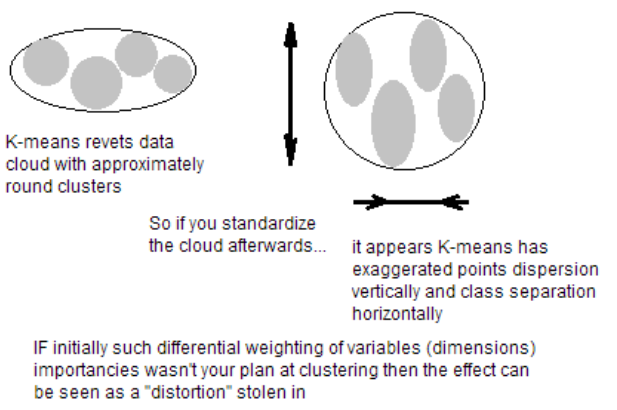



Read more on [stackoverflow](https://stackoverflow.com/questions/57507584/feature-scaling-for-kmeans-algorithm)

### Norm by lenght and standartize

Make normalization by length and standartization only for color dataset. For others fo the first time will reduce dimantions with tsne or pca.

In [4]:
def norm_std(data):
  """Return 2 datasets: normed by lenght and standartize"""
  from sklearn.preprocessing import StandardScaler
  import numpy as np
  
  scaler = StandardScaler()
  data_std = scaler.fit_transform(data)
  length = np.sqrt((data**2).sum(axis=1))[:,None]
  data_normed = data / length
  return data_std, data_normed

# standartization and normalization

X_color_std, X_color_normed = norm_std(X_color)
X_osnet_std, X_osnet_normed = norm_std(X_osnet)
X_type_std, X_type_normed = norm_std(X_type)
X_efficientnet_std, X_efficientnet_normed = norm_std(X_efficientnet)
X_color_normed

array([[-0.13402392, -0.00782351,  0.08532605, ..., -0.12115844,
        -0.06927847, -0.05140163],
       [-0.06750367,  0.00868195,  0.09402823, ..., -0.09056793,
        -0.08435471, -0.05594812],
       [-0.08555035, -0.07042927,  0.11639212, ..., -0.04616852,
        -0.09949572, -0.06338986],
       ...,
       [-0.0978316 , -0.02763622,  0.09156622, ..., -0.04315231,
        -0.07130549, -0.05023163],
       [-0.08141022, -0.00482573,  0.06943189, ..., -0.06855644,
        -0.08402214, -0.03911345],
       [-0.07716556, -0.00344991,  0.0860174 , ..., -0.07487896,
        -0.06139091, -0.01484984]], dtype=float32)

### TSNE dimension reduce

**TSNE on GPU**

First choose GPU in colab menu [runtime environment]\
After execute commited code for Rapid installation

In [ ]:
!nvidia-smi

Sat Mar 20 10:01:29 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    23W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Install RAPIDS
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!bash rapidsai-csp-utils/colab/rapids-colab.sh stable

import sys, os

dist_package_index = sys.path.index('/usr/local/lib/python3.7/dist-packages')
sys.path = sys.path[:dist_package_index] + ['/usr/local/lib/python3.7/site-packages'] + sys.path[dist_package_index:]
sys.path
exec(open('rapidsai-csp-utils/colab/update_modules.py').read(), globals())

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 205 (delta 16), reused 3 (delta 0), pack-reused 171
Receiving objects: 100% (205/205), 62.72 KiB | 12.54 MiB/s, done.
Resolving deltas: 100% (78/78), done.
PLEASE READ
********************************************************************************************************
Changes:
1. IMPORTANT SCRIPT CHANGES: Colab has updated to Python 3.7, and now runs our STABLE and NIGHTLY versions (0.18 and 0.19)!  PLEASE update your older install script code as follows:
	!bash rapidsai-csp-utils/colab/rapids-colab.sh 0.18

	import sys, os

	dist_package_index = sys.path.index('/usr/local/lib/python3.7/dist-packages')
	sys.path = sys.path[:dist_package_index] + ['/usr/local/lib/python3.7/site-packages'] + sys.path[dist_package_index:]
	sys.path
	exec(open('rapidsai-csp-utils/colab/update_modules.py').read(), globals

Lets take a look that tsne from cuml provide the same results with scikitlearn t-sne

[W] [06:14:22.756607] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


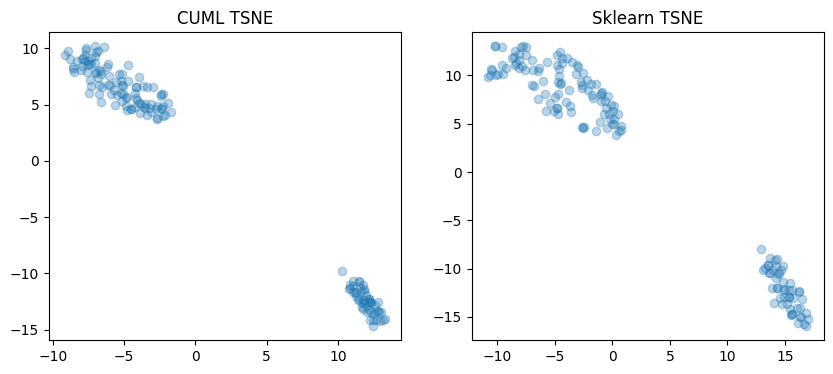

In [ ]:
# Idea from https://github.com/rapidsai/cuml/issues/2595

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE as sklTSNE
from cuml.manifold import TSNE
import numpy as np
import pandas as pd
import cudf
import matplotlib.pyplot as plt
%matplotlib inline

the_data = datasets.load_iris()
dataset = the_data.data
scaler = StandardScaler()
dataset = scaler.fit_transform(dataset)

tsne = TSNE(learning_rate_method='none', perplexity=50, n_neighbors=32, n_iter=1000,random_state=1234)
X_embedded_cuml = np.array( tsne.fit_transform(cudf.DataFrame.from_pandas(pd.DataFrame(dataset))).to_pandas() )

#Sklearn
tsne_ = sklTSNE(random_state=1234)
X_embedded = tsne_.fit_transform(dataset)


plt.style.use('default')
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10,4)
[ax1, ax2]=axs
axs[0].scatter(X_embedded_cuml[:,0],X_embedded_cuml[:,1], alpha=0.3)
axs[0].set_title('CUML TSNE')
axs[1].scatter(X_embedded[:,0],X_embedded[:,1], alpha=0.3)
axs[1].set_title('Sklearn TSNE')
plt.show()

T-sne from cuml library with parametrs: learning_rate_method='none', perplexity=50, n_neighbors=32, n_iter=1000,random_state=1234 provides the same result as sklearn tsne. Will use tsne from cuml.

In [ ]:
%%time
from cuml.manifold import TSNE
tsne = TSNE(learning_rate_method='none', perplexity=50, n_neighbors=32, n_iter=1000)
X_color_tsne = tsne.fit_transform(X_color)


[W] [20:02:34.226657] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...
CPU times: user 14.3 s, sys: 12.6 s, total: 26.9 s
Wall time: 36.6 s


In [ ]:
%%time
from cuml.manifold import TSNE
tsne = TSNE(n_components = 2)
X_hat2 = tsne.fit_transform(X_efficientnet)

[W] [19:23:40.437568] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...
CPU times: user 1min 5s, sys: 1min 6s, total: 2min 11s
Wall time: 2min 21s


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np



def tsne_transformation(data):
    """
    Return reduced tsne dataset
    """
    from cuml.manifold import TSNE
    tsne = TSNE(learning_rate_method='none', perplexity=50, n_neighbors=32, n_iter=1000)
    X_tsne = tsne.fit_transform(X_color)
    return X_tsne


# tsne dimension reduction color set
# X_color_tsne = tsne_transformation(X_color)
X_color_std_tsne = tsne_transformation(X_color_std)
X_color_normed_tsne = tsne_transformation(X_color_normed)



# tsne dimension reduction other set
# X_osnet_tsne = tsne_transformation(X_osnet)
# X_type_tsne = tsne_transformation(X_type)
# X_efficientnet_tsne = tsne_transformation(X_efficientnet)


X_osnet_std_tsne = tsne_transformation(X_osnet_std)
X_type_std_tsne = tsne_transformation(X_type_std)
X_efficientnet_std_tsne = tsne_transformation(X_efficientnet_std)

X_osnet_normed_tsne = tsne_transformation(X_osnet_normed)
X_type_normed_tsne = tsne_transformation(X_type_normed)
# X_efficientnet_normed_tsne = tsne_transformation(X_efficientnet_normed)


[W] [10:16:14.232228] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...
[W] [10:16:27.223020] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...
[W] [10:16:38.895670] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...
[W] [10:16:50.552424] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...
[W] [10:17:02.249323] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...
[W] [10:17:13.946691] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...
[W] [10:17:25.648676] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


Reduced dimensions set Visualization

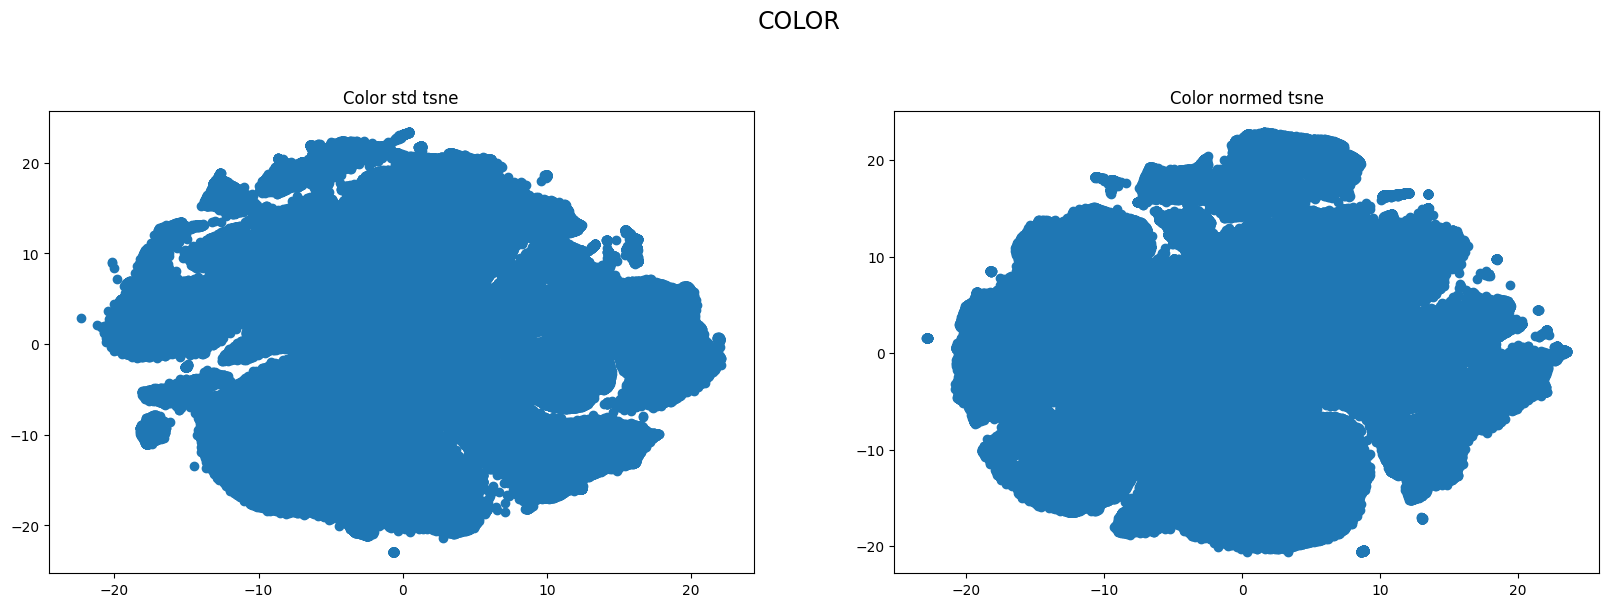

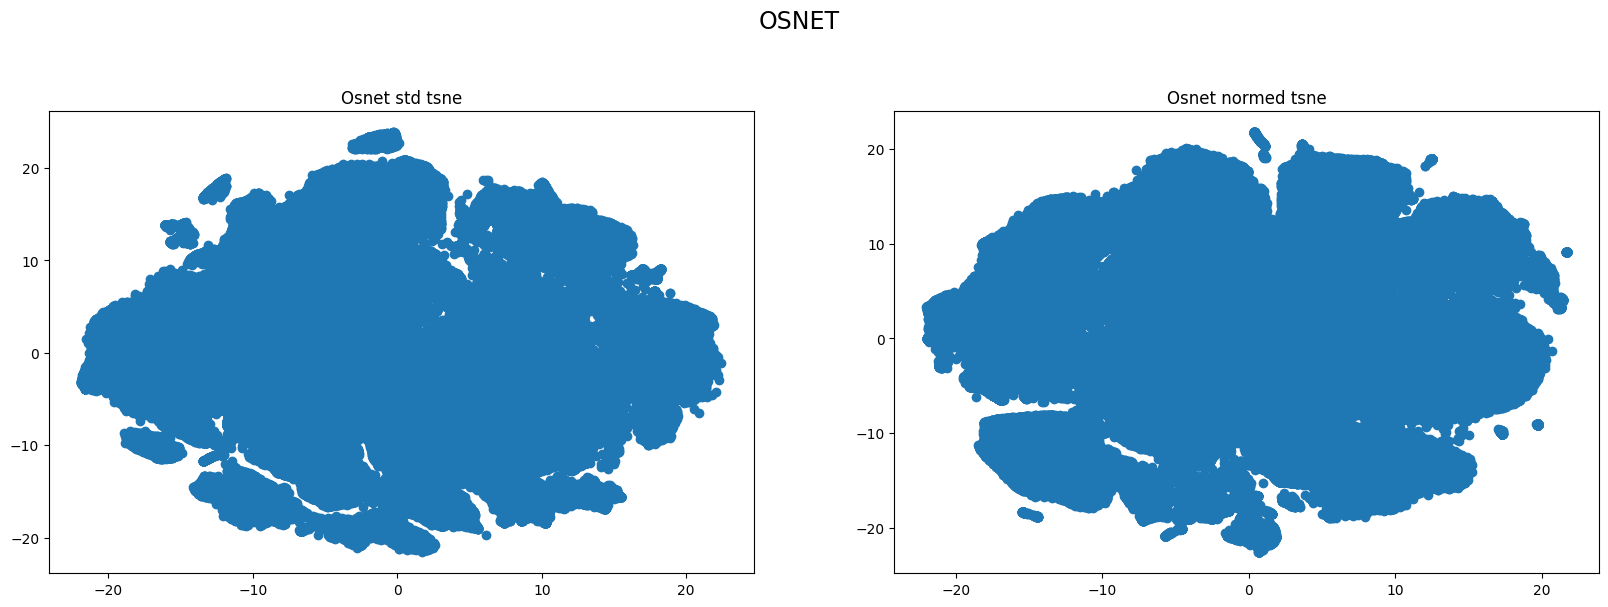

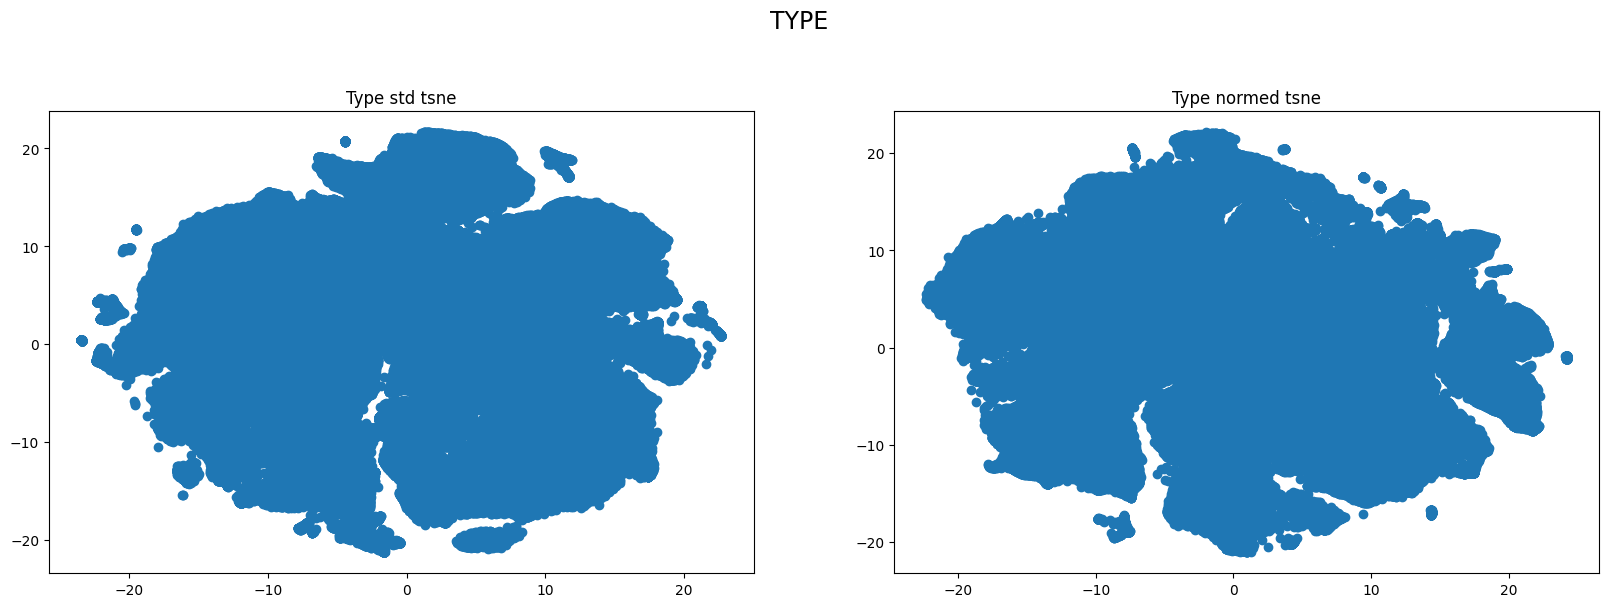

In [ ]:
def plot_n_visualisations_without_labels(n,data_low_dimentions_list,big_title,title_list):
    import matplotlib.pyplot as plt
    %matplotlib inline

    plt.style.use('default')
    fig, axs = plt.subplots(1, n)
    fig.set_size_inches(20,6)
    axes_list = ['ax'+str(i) for i in range(1,n+1)]
    axes_list = axs
    plt.suptitle(big_title, y=1.05, fontsize=17)

    for i in range(n):
        scatter = axs[i].scatter(data_low_dimentions_list[i][:,0], data_low_dimentions_list[i][:,1])
        axs[i].set_title(title_list[i])
    plt.show()

plot_n_visualisations_without_labels(2,[X_color_std_tsne,X_color_normed_tsne],'COLOR',['Color std tsne','Color normed tsne'])
plot_n_visualisations_without_labels(2,[X_osnet_std_tsne,X_osnet_normed_tsne],'OSNET',['Osnet std tsne','Osnet normed tsne'])
plot_n_visualisations_without_labels(2,[X_type_std_tsne,X_type_normed_tsne],'TYPE',['Type std tsne','Type normed tsne'])

Lets make our visualisation bigger to see clusters

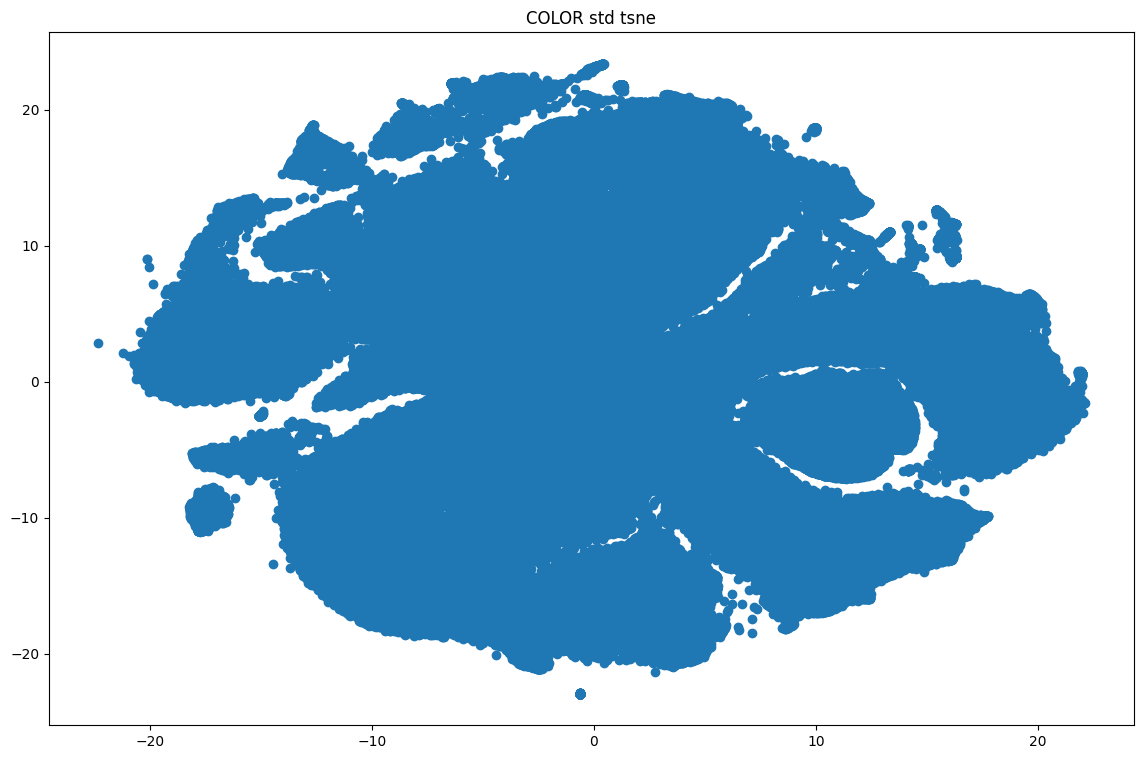

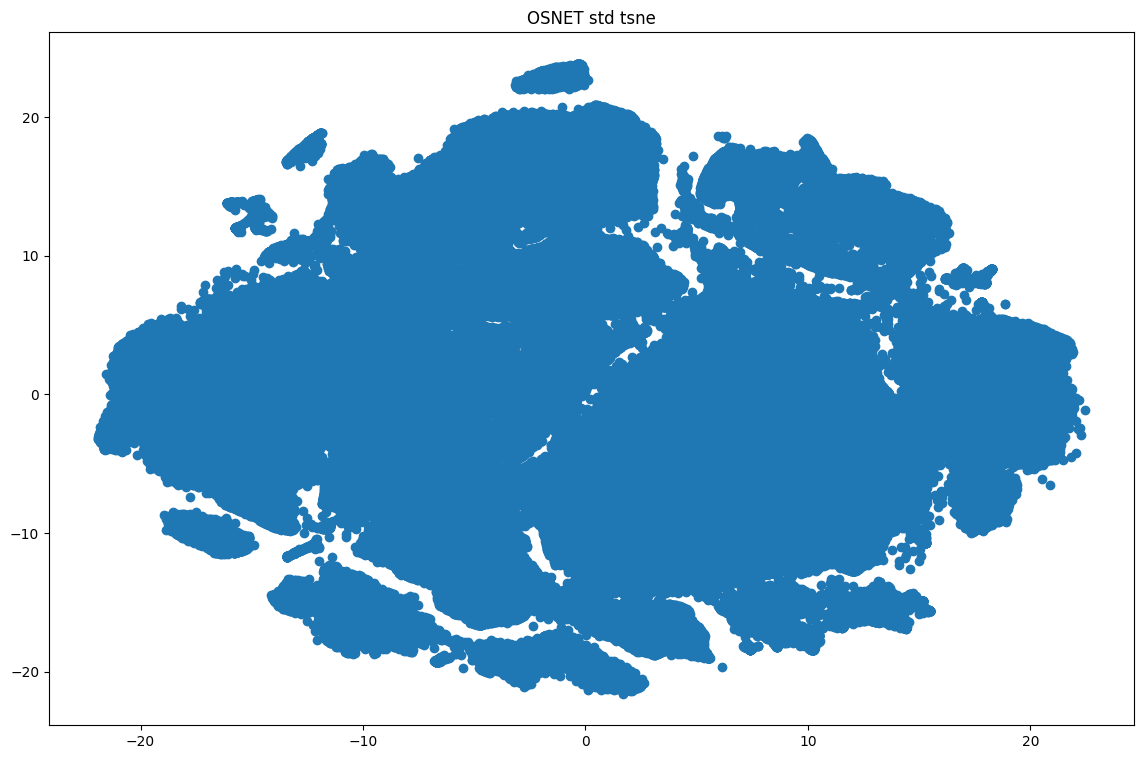

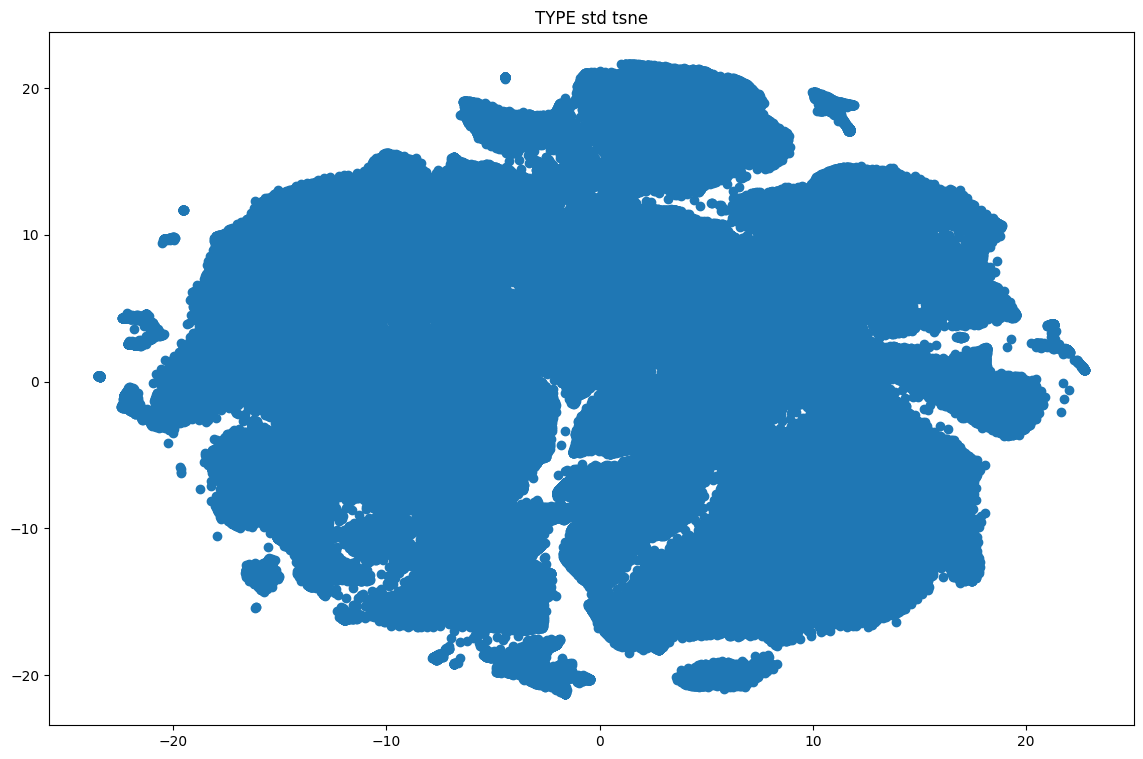

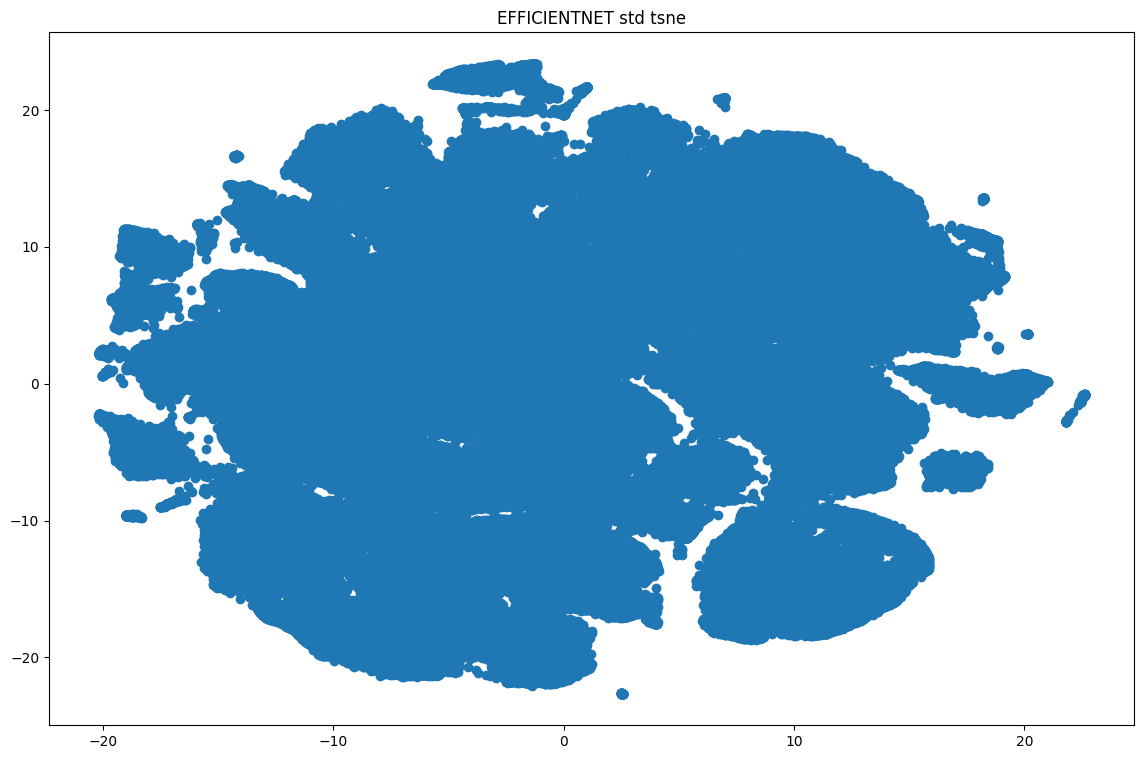

In [ ]:
def one_big_visualisation(data,title):
    """
    Plot one big 2D pic"""
    import matplotlib.pyplot as plt
    %matplotlib inline

    plt.style.use('default')
    fig, axs = plt.subplots(1, 1)
    fig.set_size_inches(14,9)
    plt.scatter(data[:,0], data[:,1])
    plt.title(title)
    plt.show()

one_big_visualisation(X_color_std_tsne,'COLOR std tsne')
one_big_visualisation(X_osnet_std_tsne,'OSNET std tsne')
one_big_visualisation(X_type_std_tsne,'TYPE std tsne')
one_big_visualisation(X_efficientnet_std_tsne,'EFFICIENTNET std tsne')

### PCA dimension reduce

In [5]:
def pca_2d(data):

    from sklearn.decomposition import PCA


    pca = PCA(n_components = 2)
    PCA_reduced = pca.fit_transform(data)
    print(PCA_reduced.shape)
    print('The proportion of the explained variance by the main components: {}'.format(pca.explained_variance_ratio_))
    print('Total proportion of the explained variance by the principal components', round(sum(pca.explained_variance_ratio_),3))
    return PCA_reduced

PCA_X_color_std_reduced = pca_2d(X_color_std)
PCA_X_color_normed_reduced = pca_2d(X_color_normed)

PCA_X_osnet_std_reduced = pca_2d(X_osnet_std)
PCA_X_osnet_normed_reduced = pca_2d(X_osnet_normed)

PCA_X_type_std_reduced = pca_2d(X_type_std)
PCA_X_type_normed_reduced = pca_2d(X_type_normed)

# PCA_X_eff_std_reduced = pca_2d(X_efficientnet_std)
# PCA_X_eff_normed_reduced = pca_2d(X_efficientnet_normed)

(416314, 2)
The proportion of the explained variance by the main components: [0.21577166 0.15101345]
Total proportion of the explained variance by the principal components 0.367
(416314, 2)
The proportion of the explained variance by the main components: [0.43096842 0.09661184]
Total proportion of the explained variance by the principal components 0.528
(416314, 2)
The proportion of the explained variance by the main components: [0.09779147 0.06155571]
Total proportion of the explained variance by the principal components 0.159
(416314, 2)
The proportion of the explained variance by the main components: [0.16055055 0.07885629]
Total proportion of the explained variance by the principal components 0.239
(416314, 2)
The proportion of the explained variance by the main components: [0.34433271 0.16282132]
Total proportion of the explained variance by the principal components 0.507
(416314, 2)
The proportion of the explained variance by the main components: [0.36270667 0.12523681]
Total pro

## Function framework

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
import numpy as np

def Kmeans_simple_exc(n_clusters,random_state, X):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmeans.fit(X)
    return kmeans.predict(X)

# Mini-Batch K-Means clustering function

def MiniBatchKmeans_exc(n_clusters, batch_size, init, random_state, X):
    """
    Return prediction the closest cluster each sample in X belongs to (an array object).
    __________________
    Keyword arguments:
    n_clusters -- the number of clusters to form
    batch_size -- size of the mini batches
    init -- method for initialization ('k-means++','random')
    random_state -- random number generation for centroid initialization
    X -- data, an array object
    __________________
    Return:
    list of predictions
    """
    minibatch_kmeans = MiniBatchKMeans(n_clusters=n_clusters, batch_size=batch_size, random_state=random_state)
    minibatch_kmeans.fit(X)
    return minibatch_kmeans.predict(X)

def quality(X, labels):
      """
    Return calinski_harabasz_score and davies_bouldin_score.
    __________________
    Keyword arguments:
    label -- labeled data
    X -- data, an array object
    """
  return calinski_harabasz_score(X, labels),  davies_bouldin_score(X, labels)

def print_quantity_clusters(labels):
          """
    Print cluster label and the number of object in each cluster.
    __________________
    Keyword arguments:
    label -- labeled data
    """
    unique, counts = np.unique(labels, return_counts=True)
    print (np.asarray((unique, counts)).T)

def elbow(K,data):
        """
    Plot elbow graphs.
    __________________
    Keyword arguments:
    K -- int wich provide range of clusters for elbow
    data -- data, an array object
    """
    chs_list = []
    db_list = []
    iteria_list = []
    for i in K:
        kmeans = KMeans(n_clusters=i, random_state=0)
        kmeans.fit(data)
        chs,db = quality(data,kmeans.predict(data))
        chs_list.append(chs)
        db_list.append(db)
        iteria_list.append(kmeans.inertia_)
    plt.style.use('default')
    fig, axs = plt.subplots(1, 3)
    fig.set_size_inches(15,6)
    fig.suptitle('Elbow method')
    [ax1, ax2, ax3]=axs
    axs[0].plot(K, chs_list, 'bx-')
    axs[0].set_title('calinski harabasz score')
    axs[1].plot(K, db_list, 'bx-')
    axs[1].set_title('davies bouldin score')
    axs[2].plot(K, iteria_list, 'bx-')
    axs[2].set_title('sum of squared distances')
    plt.show()

def plot_n_visualisations(n,data_low_dimentions,cluste_labels_list,title_list):
    plt.style.use('default')
    fig, axs = plt.subplots(1, n)
    fig.set_size_inches(20,6)
    axes_list = ['ax'+str(i) for i in range(1,n+1)]
    axes_list = axs

    for i,j in enumerate(cluste_labels_list):
        scatter = axs[i].scatter(data_low_dimentions[:,0], data_low_dimentions[:,1],c=cluste_labels_list[i], label=np.unique(cluste_labels_list[i]))
        axs[i].legend(*scatter.legend_elements(),
                    loc="lower left", title="Clusters")
        axs[i].set_title(title_list[i])

def one_big_labeled_visualisation(data,clusters,title):
    """
    Plot one big 2D pic"""
    import matplotlib.pyplot as plt
    %matplotlib inline

    plt.style.use('default')
    fig, axs = plt.subplots(1, 1)
    fig.set_size_inches(14,9)
    plt.scatter(data[:,0], data[:,1],c=clusters, label=np.unique(clusters))
    plt.title(title)
    plt.show()

def plot_9_random_image(data,column,random):    
    import skimage.io
    import matplotlib.pyplot as plt
    %matplotlib inline

    for i in data[column].unique():
        plt.style.use('default')
        fig, axs = plt.subplots(1, 9)
        fig.set_size_inches(15,6)
        [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]=axs
        fig.suptitle(column+ ' номер кластера: '+str(i), fontsize=22, y=0.67)
        for k,j in enumerate(data.loc[data[column]==i,'paths'].sample(n=9, random_state=random,replace=False)):
            adress = '/content/drive/MyDrive/01_Hackathon_09/raw_data/veriwild/'+j
            img = skimage.io.imread(adress) # call the io module and specify the file name of our image, load the image
            axs[k].imshow(img) # drawing the image to the internal pyplot buffer
    plt.show()
    

## Experiments with color set

This research made by Suhonosenko with help of framework develored by Suhonosenko [google collab link](https://colab.research.google.com/drive/1mvwodLSKG7aFSi7nmXIHkRin7ETol3r3?usp=sharing)

## Experiments with type set

This research made by Pavel Ozernov with help of framework develored by Suhonosenko [google collab link](https://colab.research.google.com/drive/1EDp80J21C_XMheu8HbGhUxQPVIqa8Xmx?usp=sharing)


## Experiments with osnet set

This research made by Nataly Avdeeva with help of framework develored by Suhonosenko [google collab link](https://colab.research.google.com/drive/10LeTRhdtaLpS0hHQEGjBIRvXfJaBhUfb?usp=sharing)

## Experiments with efficentnet set
This research made by Alex Kudryavtsev with help of framework develored by Suhonosenko [google collab link](https://colab.research.google.com/drive/1wXQIXXT4v_t6yjgqVLakDJwfUi5Gg0Lj#scrollTo=vWHwa__gVGzX)